In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('argentina_cars.csv')

In [3]:
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       498 non-null    float64
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 47.9+ KB


In [5]:
df.nunique() # bien mais pas suffisant pour comprendre la teneur du contenue de notre dataset

money         343
brand          27
model         157
year           20
color          14
fuel_type       4
door            4
gear            2
motor          22
body_type      10
kilometres    247
currency        2
dtype: int64

In [6]:
df['currency'].value_counts() # Vue les résultats je vais sois transformer les valeurs des champs 'dolares' par des valeurs en pesos

pesos      427
dólares     83
Name: currency, dtype: int64

In [7]:
df['money_change'] = df.apply(lambda row: row['money']/0.0057 if row['currency'] == 'dólares' else row['money'], axis=1)

In [8]:
df.isna().sum()

money            0
brand            0
model            0
year             0
color           11
fuel_type        0
door             0
gear             1
motor           12
body_type        1
kilometres       0
currency         0
money_change     0
dtype: int64

In [9]:
df['motor'] = df['motor'].fillna(method='bfill')

In [10]:
df['motor'] = df['motor'].astype(float)

In [11]:
df.rename(columns={'kilometres': 'km'}, inplace=True)

In [12]:
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,km,currency,money_change
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,2.4,SUV,500,pesos,1.035000e+07
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos,1.085000e+07
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares,6.228070e+06
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,1.8,SUV,550,dólares,3.333333e+06
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos,5.800000e+06


In [13]:
import matplotlib.pyplot as plt

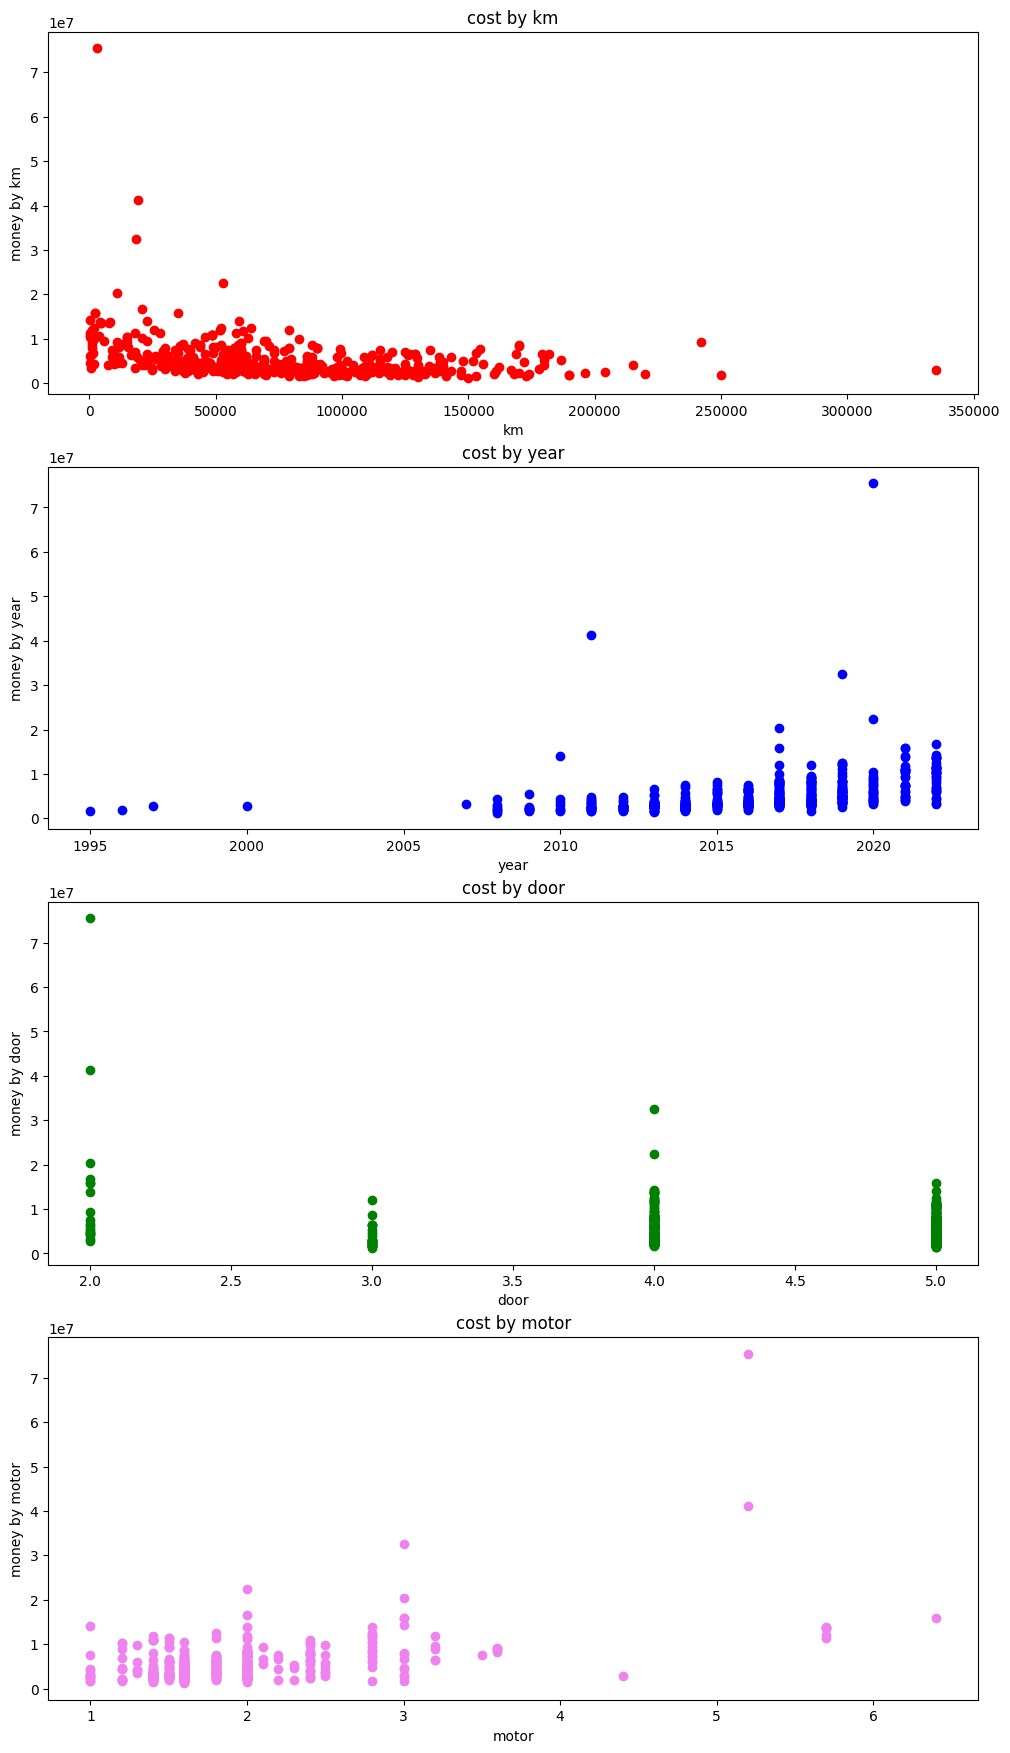

In [14]:
fig, ax = plt.subplots(4, figsize=(12,12))

ax[0].scatter(df['km'], df['money_change'], c='red')
ax[0].set_xlabel('km')
ax[0].set_ylabel('money by km')
ax[0].set_title('cost by km')

ax[1].scatter(df['year'], df['money_change'], c='blue')
ax[1].set_xlabel('year')
ax[1].set_ylabel('money by year')
ax[1].set_title('cost by year')

ax[2].scatter(df['door'], df['money_change'], c='green')
ax[2].set_xlabel('door')
ax[2].set_ylabel('money by door')
ax[2].set_title('cost by door')

ax[3].scatter(df['motor'], df['money_change'], c='violet')
ax[3].set_xlabel('motor')
ax[3].set_ylabel('money by motor')
ax[3].set_title('cost by motor')

plt.subplots_adjust(left=None, right=None, top=1.5)

plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [16]:
y = df['money_change']
X = df[['year','door', 'motor', 'km']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
scaler = MinMaxScaler()

X_train_fit = scaler.fit(X_train, y_train)
X_train_scaled = X_train_fit.transform(X_train)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df = X_train_scaled_df.rename(columns={0: "year", 1: "door", 2: "motor", 3: "km"})


In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train_scaled_df, y_train)

LinearRegression()

In [21]:
# On cherche à obtenir les données tranformer du test :

X_test_scaled_num = X_train_fit.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled_num)
X_test_scaled_df = X_test_scaled_df.rename(columns={0: "year", 1: "door", 2: "motor", 3: "km"})

model.score(X_test_scaled_df, y_test)

0.3770970771350848

In [22]:
from sklearn.model_selection import cross_validate

In [23]:
cross_validate(model, X_train, y_train, cv=5)

{'fit_time': array([0.00250244, 0.00200152, 0.00200176, 0.00250125, 0.00200152]),
 'score_time': array([0.00100088, 0.00150084, 0.0010016 , 0.00100112, 0.0015018 ]),
 'test_score': array([0.37237457, 0.43921211, 0.62190048, 0.65683374, 0.40490069])}

In [24]:
y_pred = model.predict(X_test_scaled_df)

In [25]:

# fig, ax = plt.subplots(figsize=(16, 8))

# #Pas de représentation des valeurs disponibles si jamais on souhaite mélanger toutes les features ??? 

# ax.scatter(X_test_scaled_df['km'], y_pred, c='violet')
# ax.scatter(X_test_scaled_df['motor'], y_pred, c='red')
# ax.scatter(X_test_scaled_df['year'], y_pred, c='green')

# # legend + title + 3 figures différentes
# # Régularisation méthode ridge ou lasso.

# plt.show()

In [26]:
user = pd.DataFrame({'year': [2022],'door': [3], 'motor': [4.8], 'km': [0]})
user

,year,door,motor,km
0,2022,3,4.8,0


In [27]:
user_scaled = X_train_fit.transform(user)

In [28]:
model.predict(user_scaled)

c:\Program Files\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17441017.34211165])

In [29]:
user_02 = pd.DataFrame({'year': [2000],'door':[5], 'motor': [2.4], 'km': [600000]})
user_02

,year,door,motor,km
0,2000,5,2.4,600000


In [30]:
user_02_scaled = X_train_fit.transform(user_02)

In [31]:
model.predict(user_02_scaled)

c:\Program Files\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7181755.22443615])